# **Exercício criar um segundo modelo considerando as leis brasileiras, inclusive o Banco Central. Por último comparar a curva ROC brasileira com a germânica**
- Dados Sensíveis

In [5]:
import pandas as pd

In [6]:
# https://dontpad.com/anacondabank
# MAPEAMENTO UNIFICADO - todos

url='datasets/anacondabank_credit_scoring_cleaned.csv'

df=pd.read_csv(url)

df_transformado=df.copy()

df_transformado['conta_corrente'].unique()

# etapa 2 - Dicionario
dict_cc={
    '< 0 DM':1,

    '0 <= ... < 200 DM':2,
    'no checking account':3,
    '>= 200 DM / salary assignments for at least 1 year':4
}
# etapa - Mapear
# dataset['coluna'] = dataset['coluna'].map(dicionario)

df_transformado['conta_corrente'] = df_transformado['conta_corrente'].map(dict_cc)

(df_transformado['historico_credito'].unique())
dict_hc={
    'critical account/ other credits existing (not at this bank)':1,
    'existing credits paid back duly till now':2,
    'delay in paying off in the past':3,
    'no credits taken/ all credits paid back duly':4,
    'all credits at this bank paid back duly':5
}

df_transformado['historico_credito'] = df_transformado['historico_credito'].map(dict_hc)

dict_pe={
    'domestic appliances':1,
    '(vacation - does not exist?)':2,
    'radio/television':3,
    'car (new)':4,
    'car (used)':5,
    'business':6,
    'repairs':7,
    'education':8,
    'furniture/equipment':9,
    'retraining':10


}

df_transformado['proposito_emprestimo'] = df_transformado['proposito_emprestimo'].map(dict_pe)

dict_rc={
    'unknown/ no savings account':1,
    '... < 100 DM':2,
    '500 <= ... < 1000 DM ':3,
    '.. >= 1000 DM ':4,
    '100 <= ... < 500 DM':5
}

df_transformado['reserva_cc'] = df_transformado['reserva_cc'].map(dict_rc)

df_transformado['outros_fiadores'].unique()


# Dictionary

dict_ofiador_cc = {
    'none': 0,
    'guarantor': 1,
    'co-applicant': 2

}

df_transformado['outros_fiadores'] = df_transformado['outros_fiadores'].map(dict_ofiador_cc)

df_transformado['outros_planos_financiamento'].unique()

dict_opf = {
    'none': 1,
    'bank': 2,
    'stores': 3,
    
}

df_transformado['outros_planos_financiamento'] = df_transformado['outros_planos_financiamento'].map(dict_opf)

df_transformado['propriedade'].unique()
dict_cc_prop = {
    'real estate': 1,
    'if not A121 : building society savings agreement/ life insurance': 2,
    'unknown / no property': 3,
    'if not A121/A122 : car or other, not in attribute 6': 4
}


df_transformado['propriedade'] = df_transformado['propriedade'].map(dict_cc_prop)

df_transformado['telefone'].unique()

dict_telefone = {
    'yes, registered under the customers name ':1,
    'none':0,
}

df_transformado['telefone'] = df_transformado['telefone'].map(dict_telefone)


# df_transformado['trabalhador_estrangeiro'].unique()


# dict_trabalhador_estrangeiro = {
#     'yes':1,
#     'no':0,
# }

# df_transformado['trabalhador_estrangeiro'] = df_transformado['trabalhador_estrangeiro'].map(dict_trabalhador_estrangeiro)

df_transformado['tipo_residencia'].unique()


dict_res = {
    'own':1,
    'for free':2,
    'rent':3,
}

df_transformado['tipo_residencia'] = df_transformado['tipo_residencia'].map(dict_res)

df_transformado['status_emprego'].unique()

dict_status = {
    'skilled employee / official':1,
    'unskilled - resident':2,
    'management/ self-employed/ highly qualified employee/ officer':3,
    'unemployed/ unskilled - non-resident':4
}


df_transformado['status_emprego'] = df_transformado['status_emprego'].map(dict_status)

df_transformado['tempo_emprego_atual'].unique()
dict_cc={
        '.. >= 7 years':1,
        '1 <= ... < 4 years':2,
        '4 <= ... < 7 years':3,
        'unemployed':4,
        '... < 1 year ':5

    }
df_transformado['tempo_emprego_atual'] = df_transformado['tempo_emprego_atual'].map(dict_cc)


# df_transformado['sexo_est_civil'].unique()
# dict_cc={
#     'male : single':1,
#     'female : divorced/separated/married':2,
#      'male : divorced/separated':3,
#      'male : married/widowed':4
# }
# df_transformado['sexo_est_civil'] = df_transformado['sexo_est_civil'].map(dict_cc)
df_transformado.info()

# link do mapa do mental

# https://www.mindmeister.com/3486258299/intelig-ncia-artificial

# recurso de ajuda para ver tipo object
# df_object = df.select_dtypes(include=['object'])
# df_object.head()	

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   default                      1000 non-null   int64
 1   conta_corrente               1000 non-null   int64
 2   prazo_emprestimo_meses       1000 non-null   int64
 3   historico_credito            1000 non-null   int64
 4   proposito_emprestimo         1000 non-null   int64
 5   valor_emprestimo             1000 non-null   int64
 6   reserva_cc                   1000 non-null   int64
 7   tempo_emprego_atual          1000 non-null   int64
 8   taxa_comp_salario            1000 non-null   int64
 9   outros_fiadores              1000 non-null   int64
 10  anos_residencia_atual        1000 non-null   int64
 11  propriedade                  1000 non-null   int64
 12  outros_planos_financiamento  1000 non-null   int64
 13  tipo_residencia              1000 non-null   int6

# Modelo Preditivo

In [7]:
# Definir nosso X (dados)
X = df_transformado.drop(columns='default')

In [8]:
# Definir nosso y (rótulo/classe/classificador)
y = df_transformado['default']

In [9]:
# Separar treino e teste
from sklearn.model_selection import train_test_split
SEED = 77
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30, random_state=SEED)

In [10]:
# definir algoritmo
# importar Regressão Logística
from sklearn.linear_model import LogisticRegression
# criar objeto
modelo = LogisticRegression(max_iter=3890)

In [11]:
# VAMOS TREINAR
modelo.fit(X_train,y_train)

LogisticRegression(max_iter=3890)

# Introdução a Métricas

1. Acurácia do Treino
2. Acurácia do Teste
3. Matriz Confusão
4. Classification Report
5. Curva ROC

In [12]:
# 1. Acurácia de Treino
print(f"acurácia: {modelo.score(X_train,y_train):.2f}")

acurácia: 0.75


In [13]:
# 2. Acurácia de Teste
previsoes = modelo.predict(X_test) 

In [14]:
previsoes

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [15]:
from sklearn.metrics import accuracy_score
acuracia = accuracy_score(y_test, previsoes)

In [16]:
print(f"A acurácia de teste foi: {acuracia * 100:.2f}%")

A acurácia de teste foi: 76.00%


# Matriz Confusão

- A Matriz confusão é uma métrica que auxilia na tomada de decisão, além da acurácia.

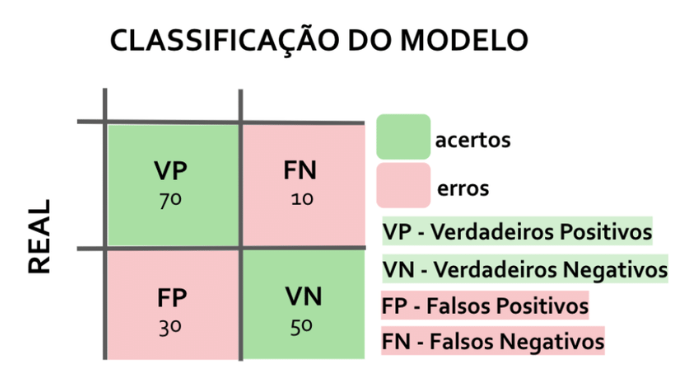

In [17]:
! pip install matplotlib

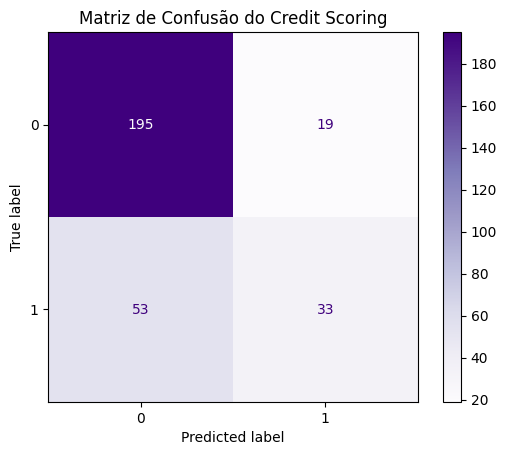

In [18]:
# importar matplotlib
import matplotlib.pyplot as plt
# importar ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay
# fazendo a previsão com o modelo treinado usando dados de teste
# O que é classe? Conjunto de Objetos
# O que é um objeto? Uma instância da classe.
y_pred = modelo.predict(X_test)
# Criando a matriz confusão
ConfusionMatrixDisplay.from_predictions(y_test,y_pred,cmap='Purples')
# Adicionar um título
plt.title('Matriz de Confusão do Credit Scoring')
# Mostrar
plt.show()

#### VP (Verdadeiros Positivos) = 195
#### FN (Falsos Negativos) = 19
#### FP (Falsos Positivos) = 53
#### VN (Verdadeiros Negativos) = 33

# Classification Report

- Acuracy
- Precision
- Recall
- F1 - SCORE
- Suport

In [19]:
from sklearn.metrics import classification_report

In [20]:
print(classification_report(y_test,previsoes))

              precision    recall  f1-score   support

           0       0.79      0.91      0.84       214
           1       0.63      0.38      0.48        86

    accuracy                           0.76       300
   macro avg       0.71      0.65      0.66       300
weighted avg       0.74      0.76      0.74       300



In [21]:
vp = 192
fn = 22
fp = 51
vn = 35


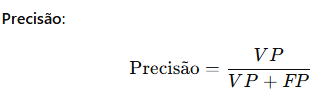

In [22]:
# precision
precisao = vp/(vp+fp)
print(f"precisão:{precisao:.2f}")

precisão:0.79


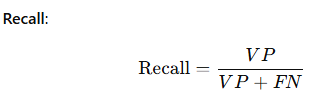

In [23]:
# recall
# proporção de predições corretas  da categoria alvo
# default (0 - reprovado 1 - aprovado)
recall = vp/(vp+fn)
print(f"recall:{recall:.2f}")

recall:0.90


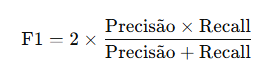

In [24]:
# f1-score
# média harmônica entre precisão e recall

f1_score = 2*(precisao*recall)/(precisao+recall)
print(f"A média harmônica entre precisão e recall:{f1_score:.2f}")

A média harmônica entre precisão e recall:0.84


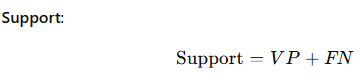

In [25]:
# support

# Suport é a quantidade absoluta de casos encontrados em cada categoria
# 1000 casos ------700 casos corretos e 300 casos incorretos
# 79 milhões de brasileiros inadiplentes do total de 212 milhões
support = vp+fn
print(f"support:{support}")

support:214


# Acurácia

- No exemplo do classificador de cachorros
- 100 casos
- Se 84 casos são corretos, quanto que é minha acurácia?
- 84% de acurácia

# Precisão

- É a proporção de predições corretas de uma categoria (defaut)
- De todos os animais que o meu classificador disse que era um cachorro, quantos realmente eram um cachorro?
- precisao = vp/(vp+fp)

# Recall

- As medidas derivam da matriz de confusão
- É a proporção de predições corretas da categoria alvo
- recall = vp/(vp+fn)

# F1- Score

- É o equilibrio entre a precisão e o recall
- f1_score = 2*(precisao*recall)/(precisao+recall)

# Support
- Quantidade absoluta de casos de cada categoria

# Curva ROC

In [26]:
# Importar                  # curva     #area
from sklearn.metrics import roc_curve, roc_auc_score

# objetivo: ajudar na escolha do melhor modelo
# Qual a diferença entre o roc_curve e roc_auc_score?

# roc_curve - curva
# roc_auc_score - -area

# conceitos matemáticos: limite, integral (calcular a área abaixo da curva e acima)

# taxa de verdadeiros positivos
# taxa de falsos positivos
# limite - limiar

# Probabilidade
prob_previsao = modelo.predict_log_proba(X_test)[:,1]

tfp,tvp,limite = roc_curve(y_test,prob_previsao)

# área
print('roc_auc',roc_auc_score(y_test,prob_previsao))

roc_auc 0.7578787220169528


In [27]:
import matplotlib.pyplot as plt

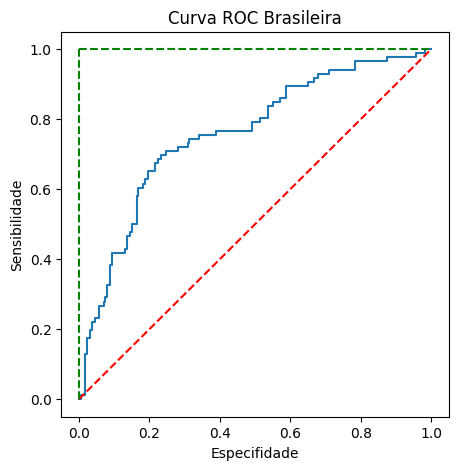

In [34]:
# cria uma imagem
plt.subplots(1, figsize=(5,5))
plt.title('Curva ROC Brasileira')
plt.plot(tfp,tvp)
plt.xlabel('Especifidade')
plt.ylabel('Sensibilidade')
plt.plot([0, 1], ls="--", c = 'red') #plotando linha guia pontilhada vermelha
plt.plot([0, 0], [1, 0], ls="--", c = 'green'), plt.plot([1, 1], ls="--", c = 'green') #plotando linha guia pontilhada verde
plt.show()

## **Comparação com a Curva ROC Germâmica**

![Comparacao](comparacao_germ_br.png)